In [1]:
import pandas as pd

cars = pd.read_csv('/Users/Ikkei/data-analysis/DAT18NYC/data/used_vehicles.csv')

cars

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [2]:
cars.type = cars.type.map({'car':0, 'truck':1})

In [3]:
feature_cols = cars.columns[1:]

In [4]:
X = cars[feature_cols]
y = cars.price

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

In [8]:
preds = tree_reg.predict(X_test)

In [9]:
from sklearn import metrics
import numpy as np

#RMSE
np.sqrt(metrics.mean_squared_error(y_test, preds))

4622.4993239588475

In [10]:
from sklearn.cross_validation import cross_val_score
cross_val_score(tree_reg, X, y, )

array([-4.13990826, -9.56603774,  0.47342398])

In [11]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4804.3767888427128

In [12]:
for i in xrange(1, 6, 1):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    
    print 'depth', i, np.mean(np.sqrt(-scores))

depth 1 4928.1374642
depth 2 4804.37678884
depth 3 4592.15542558
depth 4 4704.00526948
depth 5 4707.25058848


In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_depth = 0

for i in xrange(1, 6, 1):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    
    curr_score = np.mean(np.sqrt(-scores))
    all_scores.append(curr_score)
    
    if curr_score < best_score or best_score==-1:
        best_score = curr_score
        best_depth = i

print 'best_score: ', best_score
print 'best_depth: ', best_depth

plt.figure()
plt.plot(range(1, 6), all_scores)
plt.xlabel('x=max tree depth')

best_score:  4592.15542558
best_depth:  3


In [15]:
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=3,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=1,
           splitter='best')

In [16]:
X_mycar = pd.DataFrame([[2008, 98000, 4, 0]], columns=feature_cols)
treereg.predict(X_mycar)

array([ 9250.])

In [17]:
X_mycar = pd.DataFrame([[2008, 980000000, 4, 0]], columns=feature_cols)
treereg.predict(X_mycar)

array([ 9250.])

In [18]:
pd.DataFrame({'feature': feature_cols,
             'importance': tree_reg.feature_importances_})

,feature,importance
0,year,0.080554
1,miles,0.917050
2,doors,0.002396
3,type,0.000000


In [20]:
from sklearn.tree import export_graphviz
with open("15_vehicles.dot", 'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)

dot -Tpng 15_vehicles.dot -o 15_vehicles.png
<img src="15_vehicles.png">

#Titanic's Data

In [68]:
titanic = pd.read_csv('/Users/Ikkei/data-analysis/DAT18NYC/data/titanic.csv')
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [69]:
titanic.sex = titanic.sex.map({'male': 0, 'female': 1})

In [70]:
titanic.count()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [71]:
agegroup = titanic.groupby('age')['sibsp', 'parch'].count()

In [72]:
agegroup['age_group'] = agegroup.index.map(lambda x: int(x / 10))

In [73]:
agegroup.groupby('age_group').mean()

,sibsp,parch
age_group,,
0,4.428571,4.428571
1,9.272727,9.272727
2,15.714286,15.714286
3,11.928571,11.928571
4,7.416667,7.416667
5,4.363636,4.363636
6,2.714286,2.714286
7,1.500000,1.500000
8,1.000000,1.000000


In [74]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [75]:
titanic.count()

survived    891
pclass      891
name        891
sex         891
age         891
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [91]:
embarked = pd.get_dummies(titanic.embarked, prefix='embarked_').iloc[:, 1:]
titanic = titanic.join(embarked)

In [95]:
feat_cols = ['pclass', u'sex', u'age', u'fare', u'embarked__Q', u'embarked__S']
X = titanic[feat_cols]
y = titanic.survived

best_score:  0.35480035278
best_depth:  3


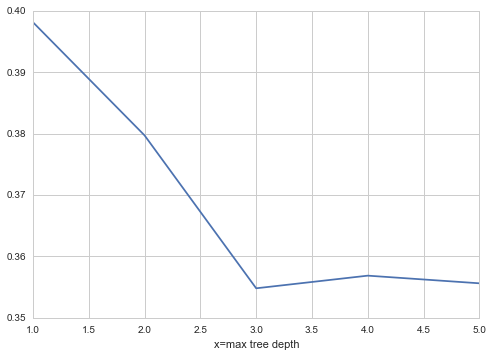

In [101]:
sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_depth = 0

for i in xrange(1, 6, 1):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=100, scoring='mean_squared_error')
    
    curr_score = np.mean(np.sqrt(-scores))
    all_scores.append(curr_score)
    
    if curr_score < best_score or best_score==-1:
        best_score = curr_score
        best_depth = i

print 'best_score: ', best_score
print 'best_depth: ', best_depth

plt.figure()
plt.plot(range(1, 6), all_scores)
plt.xlabel('x=max tree depth')